## Prompt Metadata

#### Metadata File to pandas dataframe

In [2]:
from src.utils import read_yaml
import pandas as pd
import numpy as np
import matplotlib

In [3]:
metadata = read_yaml("prompt-metadata/anli1.yaml")

In [4]:
# flatten metadata and convert to dataframe
metadata = {k: {**v['costs'], **v['characteristics'], **v['performance']} for k, v in metadata.items()}
meta_df = pd.DataFrame.from_dict(metadata, orient='index')

In [12]:
meta_df.head()

,avg_cost_per_query,avg_nr_tokens_received,avg_nr_tokens_sent,total_accumulated_costs,total_performed_queries,total_tokens_received,total_tokens_sent,avg_len_of_explanations,avg_nr_of_sentences,avg_nr_of_words,flesch_reading_ease,n_none_responses,n_parse_errors,total_length_of_explanations,total_number_of_sentences,total_number_of_words,total_reponses,accuracy,n_correct,n_wrong
1,0.000203,30.080000,125.280,0.025320,125,3760,15660,123.76,1.04,20.66,47.3,0,0,15470,130,2583,125,0.592,74,51
2,0.000330,40.824000,215.096,0.041242,125,5103,26887,168.98,1.10,27.17,40.8,0,0,21123,137,3396,125,0.456,57,68
3,0.000154,2.776000,123.280,0.019296,125,347,15410,0.00,0.00,0.00,0.0,125,0,0,0,0,0,0.576,72,53
4,0.000368,89.040000,126.840,0.018417,50,4452,6342,331.56,2.92,53.75,46.5,2,1,15915,140,2580,48,0.600,30,20
5,0.000418,105.958333,137.125,0.010023,24,2543,3291,376.42,3.10,60.81,46.2,2,0,18068,149,2919,48,0.460,23,27


<Axes: title={'center': 'Flesch Reading Ease'}, ylabel='Frequency'>

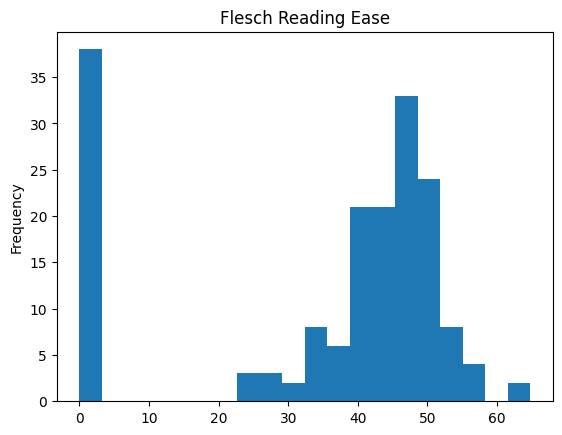

In [7]:
meta_df["flesch_reading_ease"].plot.hist(bins=20, title="Flesch Reading Ease")

<Axes: title={'center': 'Accuracy vs. Flesch Reading Ease'}, xlabel='flesch_reading_ease', ylabel='accuracy'>

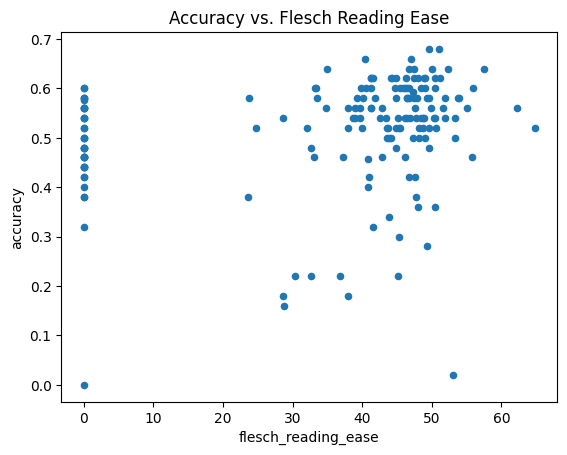

In [15]:
# scatter plots of accuracy vs. flesch reading ease
meta_df.plot.scatter(x="flesch_reading_ease", y="accuracy", title="Accuracy vs. Flesch Reading Ease")

<Axes: title={'center': 'Accuracy vs. Flesch Reading Ease'}, xlabel='avg_cost_per_query', ylabel='accuracy'>

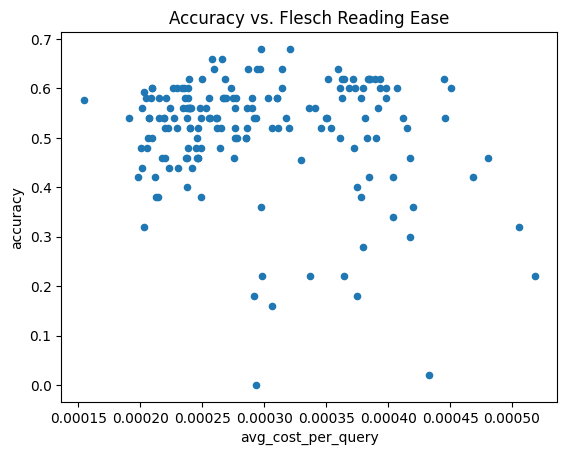

In [24]:
meta_df.plot.scatter(x="avg_cost_per_query", y="accuracy", title="Accuracy vs. Flesch Reading Ease")

<Axes: title={'center': 'Accuracy vs. Index'}>

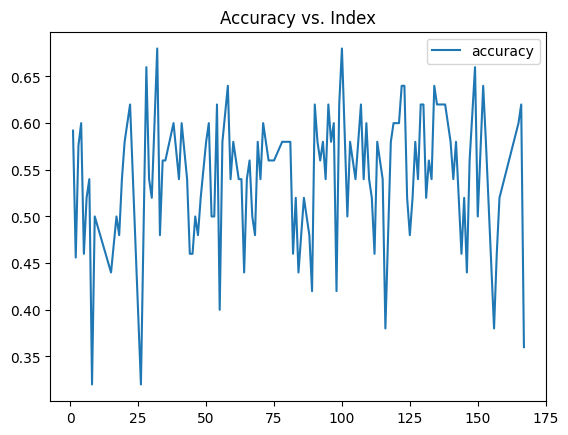

In [21]:
# line plot of accuracy vs index, filtered by n_parse_errors < 10
meta_df[meta_df["n_parse_errors"] < 2].plot.line(y="accuracy", title="Accuracy vs. Index")